Inspired by seaborn;s open logo:
- https://github.com/mwaskom/seaborn/issues/2243
- https://gist.github.com/mwaskom/7eb7d01d9aa25ea83894293027d12a8c
- https://seaborn.pydata.org/citing.html

In [1]:
!pip install matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import gaussian
from scipy.spatial import distance



In [3]:
xy_cache = {}
def poisson_disc_sample(array_radius, pad_radius, candidates=100, d=2, rng=None):
    """Find positions using poisson-disc sampling."""
    # See http://bost.ocks.org/mike/algorithms/

    key = array_radius, pad_radius
    if key in xy_cache:
        return xy_cache[key]

    if rng is None:
        rng = np.random.default_rng()
    uniform = rng.uniform
    randint = rng.integers

    # Start at a fixed point we know will work
    start = np.zeros(d)
    samples = [start]
    queue = [start]

    while queue:

        # Pick a sample to expand from
        s_idx = randint(len(queue))
        s = queue[s_idx]

        for i in range(candidates):
            # Generate a candidate from this sample
            coords = uniform(s - 2 * pad_radius, s + 2 * pad_radius, d)

            # Check the three conditions to accept the candidate
            in_array = np.sqrt(np.sum(coords ** 2)) < array_radius
            in_ring = np.all(distance.cdist(samples, [coords]) > pad_radius)

            if in_array and in_ring:
                # Accept the candidate
                samples.append(coords)
                queue.append(coords)
                break

        if (i + 1) == candidates:
            # We've exhausted the particular sample
            queue.pop(s_idx)

    samples = np.array(samples)
    xy_cache[key] = samples

    return samples


In [4]:
def logo(ax,
        colors,
        pdf_means,
        pdf_sigma, dy, y0, w, h,
):

    # Square, invisible axes with specified limits to center the logo
    ax.set(xlim=(40, 90), ylim=(0, 50))
    ax.set_axis_off()
    ax.set_aspect('equal')

    # Full x and y grids for a gaussian curve
    x = np.arange(101)
    y = gaussian(x.size, pdf_sigma)

    x0 = 30  # Magic number
    xx = x[x0:]

    # Vertical distances between the PDF curves
    n = len(pdf_means)
    dys = np.linspace(0, (n - 1) * dy, n) - (n * dy / 2)
    dys -= dys.mean()

    # Compute the PDF curves with vertical offsets
    pdfs = [h * (y[x0 - m:-m] + y0 + dy) for m, dy in zip(pdf_means, dys)]

    # Add in constants to fill from bottom and to top
    pdfs.insert(0, np.full(xx.shape, -h))
    pdfs.append(np.full(xx.shape, 50 + h))

    # Add each smooth PDF "wave"
    for i, pdf in enumerate(pdfs[1:]):
        colors_i = colors[i]

        poly = ax.fill_between(
            xx,
            pdfs[i] + w,
            pdf,
            # color=colors_i[0],
            color='none',
            alpha=1,
            antialiased=True,
            lw=0,
        )
        poly.set_clip_path(circle_fg)

        #
        poly_path = poly.get_paths()[0]
        # circle_fg_path = circle_fg.get_path()

        gradient = plt.imshow(
            np.linspace(0, 1, 256).reshape((1, -1)),
            cmap=LinearSegmentedColormap.from_list("Custom", colors_i, N=3000),
            aspect='auto',
            extent=[
                poly_path.vertices[:, 0].min(),
                poly_path.vertices[:, 0].max(),
                poly_path.vertices[:, 1].min(),
                poly_path.vertices[:, 1].max(),
            ],
        )
        gradient.set_clip_path(poly_path, transform=ax.transData)



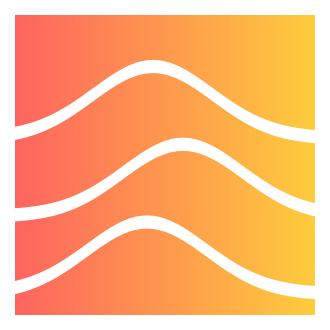

In [178]:
plt.rcParams["figure.dpi"] = 150

bg_color = [1, 1, 1, 0]
# bg_color = [1, 1, 1, 1]
# bg_color = "#34363C"


fig, ax = plt.subplots(figsize=(2, 2), facecolor=bg_color)

# Clipping artist (not shown) for the interior elements
radius = 25
center = (65, 25)
circle_fg = patches.Circle(center, radius=radius, transform=ax.transData)

logo(
    ax,
    # plotly logo blues
    # colors=[
    #     [0.22, 0.50, 0.96],
    #     [0.31, 0.62, 0.97],
    #     [0.40, 0.73, 0.99],
    #     [0.48, 0.85, 1.0],
    # ],
    # plotly logo colors
    # colors=[
    #     [0.97, 0.24, 0.47],
    #     [0.85, 0.47, 0.64],
    #     [0.73, 0.65, 0.80],
    #     [0.54, 0.86, 0.97],
    # ],
    # my blues
    # colors=[
    #     ([0.48, 0.85, 1.0], ),
    #     ([0.40, 0.73, 1.0], ),
    #     ([0.31, 0.62, 1.0], ),
    #     ([0.22, 0.50, 1.0], ),
    # ][::-1],
    colors=[
        # ("#0072FF", "#00C6FF"),
        # ("#0072FF", "#00C6FF"),
        # ("#0072FF", "#00C6FF"),
        # ("#0072FF", "#00C6FF"),
        # ("#0072FF", "#00C6FF"),
        #
        # ("#9600FF", "#AEBAF8"),
        # ("#9600FF", "#AEBAF8"),
        # ("#9600FF", "#AEBAF8"),
        # ("#9600FF", "#AEBAF8"),
        # ("#9600FF", "#AEBAF8"),
        #
        # ("#04B0FD", "#00E1FA"),
        # ("#04B0FD", "#00E1FA"),
        # ("#04B0FD", "#00E1FA"),
        # ("#04B0FD", "#00E1FA"),
        # ("#04B0FD", "#00E1FA"),
        #
        ("#FE5066", "#FFE136"),
        ("#FE5066", "#FFE136"),
        ("#FE5066", "#FFE136"),
        ("#FE5066", "#FFE136"),
        # ("#FE5066", "#FFE136"),
        # ("#FE5066", "#FFE136"),
        #
        # ("#8145FD", "#FF3AA1"),
        # ("#8145FD", "#FF3AA1"),
        # ("#8145FD", "#FF3AA1"),
        # ("#8145FD", "#FF3AA1"),
        # ("#8145FD", "#FF3AA1"),
        #
        # ([0.2, 0.5, 1], [0.5, 0.9, 1]),
        # ([0.2, 0.5, 1], [0.5, 0.9, 1]),
        # ([0.2, 0.5, 1], [0.5, 0.9, 1]),
        # ([0.2, 0.5, 1], [0.5, 0.9, 1]),
        # ([0.2, 0.5, 1], [0.5, 0.9, 1]),
    ][::-1],
    # pandas logo colors
    # colors=[
    #     [1.00, 0.79, 0.00],  # yellow
    #     [0.91, 0.01, 0.53],  # magenta
    #     [0.08, 0.03, 0.33],  # blue
    #     [1.00, 1.00, 1.00],  # white
    # ][::-1],
    # plotly default colors
    # colors=[
    #     ("#FFB782", "#FFA15A", "#FFA15A", "#FFA15A", "#FFBA88"),  # ORANGE: "#FFA15A", "#FFB782", "#FFBA88"
    #     ("#C28CFC", "#AB63FA", "#AB63FA", "#AB63FA", "#C693FD"),  # PURPLE: "#AB63FA", "#C28CFC", "#C693FD"
    #     ("#6ADAB2", "#00CC96", "#00CC96", "#00CC96", "#74DCB7"),  # GREEN:  "#00CC96", "#6ADAB2", "#74DCB7"
    #     ("#F4806C", "#EF553B", "#EF553B", "#EF553B", "#F58674"),  # RED:    "#EF553B", "#F4806C", "#F58674"
    #     ("#7D86FC", "#636EFA", "#636EFA", "#636EFA", "#818AFC"),  # BLUE:   "#636EFA", "#7D86FC", "#818AFC"
    # ][::-1],
    pdf_means=[12, 18, 13],
    pdf_sigma=10,
    dy=1.08,
    y0=1.28,
    w=2.2,
    h=12,
)

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
fig.savefig("logo-badge.png", dpi=300)
plt.show()

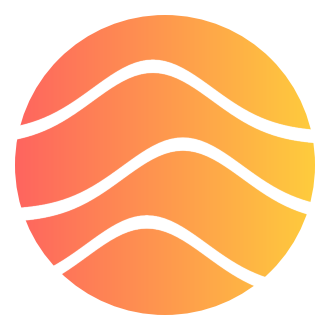

In [179]:
image = plt.imread('logo-badge.png')

fig, ax = plt.subplots(figsize=(2, 2), facecolor=bg_color)
im = ax.imshow(image)
im.set_clip_path(patches.Circle((300, 300), radius=300, transform=ax.transData))

ax.set(xlim=(0, 600), ylim=(0, 600))
ax.set_axis_off()
ax.set_aspect('equal')
ax.invert_yaxis()

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
fig.savefig("result.png", facecolor=bg_color, dpi=300)